<a href="https://colab.research.google.com/github/rkamatn/Image-Classification/blob/main/freshrotten_fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image classification**

## **Introduction**

Image classification is one of the main topics in the field of computer vision and is widely used across industries. With the advancement of deep learning, significant improvements in classification accuracy have been achieved, leading to applications in object detection, face recognition, and medical imaging.

In the food industry, the freshness of fruits and vegetables is a critical quality factor. If rotten produce is not separated from fresh items, it can contaminate other products and reduce overall productivity. Traditionally, the quality assessment of fruits and vegetables has relied on manual visual inspection by trained personnel. However, manual classification requires specialized knowledge of multiple characteristics such as color, texture, and shape. In addition, maintaining consistency and accuracy in manual inspection is a persistent challenge.

To address these limitations, image classification techniques using deep learning provide an efficient and reliable solution for automatically detecting and classifying fruits and vegetables based on their freshness levels.

## **Description of Data**

The data for this study has been downloaded from Kaggle. The dataset can be accessed at [Fresh and Rotten classification](https://www.kaggle.com/datasets/swoyam2609/fresh-and-stale-classification).

This dataset comprises a diverse range of fruits and vegetables commonly found in culinary settings, including apples, oranges, bananas, tomatoes, cucumbers, okra and potatoes. Each item in the dataset is captured in multiple images, representing both fresh and rotten states. The dataset encompasses a variety of fruit and vegetable types to ensure the generalization and robustness of the classification models.

This dataset is subcatogorized into Train and Test folders. Within these folders are the subcatogories of fresh and rotten fruits and vegetables. Examples would be freshoranges, rottenoranges, freshokra, rottenokra etc.

**Key Features:**

**Image Variety:** The dataset contains a substantial number of images, with a significant variation in lighting conditions, angles, and backgrounds. This diversity helps to mimic real-world scenarios and challenges the classification models to be robust and accurate under various conditions.

**Freshness Levels:** The dataset provides a clear distinction between fresh and rotten/stale states, allowing for the training of models capable of accurately identifying the level of decay in fruits and vegetables.

**Annotation:** Each image in the dataset is carefully labeled with appropriate annotations indicating whether the item is fresh or rotten/stale. This enables supervised learning and facilitates the development of classification models.

**High-Quality Images:** The dataset includes high-resolution images captured with professional-grade cameras. The images are meticulously edited to ensure clarity and eliminate noise, providing a solid foundation for training reliable classification models.

**Large Scale:** With thousands of images available, the dataset offers a significant volume of data suitable for training deep learning models. This allows for more extensive training and validation, leading to more robust and accurate classification models.

**Potential Applications**

The Fresh and Rotten/Stale Fruits and Vegetables Classification Dataset can be employed in a wide range of applications, including:

**Food Quality Inspection**: The dataset can be used to develop computer vision systems for automated food quality inspection in production lines, enabling rapid identification and removal of rotten/stale produce.

**Smart Refrigeration System**s: By integrating the classification models trained on this dataset, smart refrigeration systems can automatically detect and alert users about the freshness of fruits and vegetables, helping to reduce food waste.

**Retail and E-commerce**: Online grocery stores and retail outlets can utilize the dataset to enhance their product categorization and inventory management systems, ensuring only fresh produce is made available to customers.

**Agriculture and Farming**: The dataset can aid in the development of computer vision systems for farmers, enabling early detection of spoilage in crops and assisting in timely intervention to minimize losses.

By utilizing the Fresh and Rotten/Stale Fruits and Vegetables Classification Dataset, researchers and developers can advance the field of computer vision, leading to improved food quality assessment, reduced food waste, and enhanced agricultural practices.

## Set up


### Import the `fastai` library

Import all items from `fastai.vision.all`

In [1]:
from fastai.vision.all import *

Import all items from `fastcore.all`

In [2]:
from fastcore.all import *

## **Data processing**

###Download and get the path to the images from Kaggle.

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("swoyam2609/fresh-and-stale-classification")

print("Path to dataset files:", path)

100%|██████████| 2.84G/2.84G [00:43<00:00, 69.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/swoyam2609/fresh-and-stale-classification/versions/1


###Setting the downloaded data path to base directory so that it can be easily run by everyone. Since I have to rename some of the folders that are misplelled and delete some of the folders

In [4]:
# --- Environment detection ---
if os.path.exists("/kaggle/working"):
    # Running on Kaggle
    base_dir = "/kaggle/input/fresh-and-stale-classification/dataset"
elif os.path.exists("/content"):
    # Running on Google Colab
    base_dir = os.path.join(path, "dataset")
else:
    # Default fallback (e.g., local machine)
    base_dir = os.path.join(path, "dataset")

print(f"\n✅ Base directory set to:\n{base_dir}")


✅ Base directory set to:
/root/.cache/kagglehub/datasets/swoyam2609/fresh-and-stale-classification/versions/1/dataset


### Setting the train and test path by joining it to base directory

In [5]:

train_path = os.path.join(base_dir, "Train")
test_path  = os.path.join(base_dir, "Test")
print(train_path)
print(test_path)


/root/.cache/kagglehub/datasets/swoyam2609/fresh-and-stale-classification/versions/1/dataset/Train
/root/.cache/kagglehub/datasets/swoyam2609/fresh-and-stale-classification/versions/1/dataset/Test


In [6]:
# Check for the names of the fruit and vegetable folder

print("Train folders:", os.listdir(train_path))
print("Test folders:", os.listdir(test_path))


Train folders: ['rottenbanana', 'rottentomato', 'freshokra', 'freshbittergroud', 'rottencucumber', 'freshapples', 'freshcapsicum', 'rottenokra', 'rottenoranges', 'freshbanana', 'rottenpotato', 'rottenbittergroud', 'freshpotato', 'freshcucumber', 'freshoranges', 'freshtomato', 'rottenapples', 'rottencapsicum']
Test folders: ['rottenbanana', 'freshokra', 'rottencucumber', 'freshapples', 'rottentamto', 'rottenokra', 'rottenoranges', 'freshbanana', 'rottenpatato', 'freshcucumber', 'freshoranges', 'freshpatato', 'freshtamto', 'rottenapples']


Since the source folders are read only, we are creating a new directory that we will be working on.

As we can see above that the dataset names are not uniform across the  train and test folders. So what we do in the next step is delete the folders ["freshbittergroud", "rottenbittergroud",freshcapsicum", "rottencapsicum"] because these folders are only present in training folders, rename the folders {
    "freshtamto": "freshtomato",
    "rottentamto": "rottentomato",
    "freshpatato": "freshpotato",
    "rottenpatato": "rottenpotato"
}.



### Create writable folders, drop few folders and rename few folders

In [7]:
import os, shutil

# Source folders
src_train = train_path
src_test  = test_path

# Destination (writable)
dst_train = "/kaggle/working/Train_clean"
dst_test  = "/kaggle/working/Test_clean"

os.makedirs(dst_train, exist_ok=True)
os.makedirs(dst_test, exist_ok=True)

# Folders to drop completely
drop_folders = ["freshbittergroud", "rottenbittergroud",
                "freshcapsicum", "rottencapsicum"]

# Folders to rename (old_name : new_name)
rename_map = {
    "freshtamto": "freshtomato",
    "rottentamto": "rottentomato",
    "freshpatato": "freshpotato",
    "rottenpatato": "rottenpotato"
}

def copy_and_clean(src, dst):
    for folder in os.listdir(src):
        folder_path = os.path.join(src, folder)
        if not os.path.isdir(folder_path):
            continue

        # Skip unwanted veggie folders
        if folder in drop_folders:
            print(f"🚫 Skipped: {folder}")
            continue

        # Rename if needed
        new_folder = rename_map.get(folder, folder)
        dst_path = os.path.join(dst, new_folder)

        # Copy folder (dirs_exist_ok=True lets it overwrite safely)
        shutil.copytree(folder_path, dst_path, dirs_exist_ok=True)
        print(f"✅ Copied: {folder} → {new_folder}")

# Run for Train and Test
copy_and_clean(src_train, dst_train)
copy_and_clean(src_test, dst_test)

print("\n🎯 All done! Cleaned folders are in /kaggle/working/Train_clean and /kaggle/working/Test_clean")


✅ Copied: rottenbanana → rottenbanana
✅ Copied: rottentomato → rottentomato
✅ Copied: freshokra → freshokra
🚫 Skipped: freshbittergroud
✅ Copied: rottencucumber → rottencucumber
✅ Copied: freshapples → freshapples
🚫 Skipped: freshcapsicum
✅ Copied: rottenokra → rottenokra
✅ Copied: rottenoranges → rottenoranges
✅ Copied: freshbanana → freshbanana
✅ Copied: rottenpotato → rottenpotato
🚫 Skipped: rottenbittergroud
✅ Copied: freshpotato → freshpotato
✅ Copied: freshcucumber → freshcucumber
✅ Copied: freshoranges → freshoranges
✅ Copied: freshtomato → freshtomato
✅ Copied: rottenapples → rottenapples
🚫 Skipped: rottencapsicum
✅ Copied: rottenbanana → rottenbanana
✅ Copied: freshokra → freshokra
✅ Copied: rottencucumber → rottencucumber
✅ Copied: freshapples → freshapples
✅ Copied: rottentamto → rottentomato
✅ Copied: rottenokra → rottenokra
✅ Copied: rottenoranges → rottenoranges
✅ Copied: freshbanana → freshbanana
✅ Copied: rottenpatato → rottenpotato
✅ Copied: freshcucumber → freshcucumb

In [8]:
print("Train_clean folders:", sorted(os.listdir(dst_train)))
print("Test_clean folders:", sorted(os.listdir(dst_test)))


Train_clean folders: ['freshapples', 'freshbanana', 'freshcucumber', 'freshokra', 'freshoranges', 'freshpotato', 'freshtomato', 'rottenapples', 'rottenbanana', 'rottencucumber', 'rottenokra', 'rottenoranges', 'rottenpotato', 'rottentomato']
Test_clean folders: ['freshapples', 'freshbanana', 'freshcucumber', 'freshokra', 'freshoranges', 'freshpotato', 'freshtomato', 'rottenapples', 'rottenbanana', 'rottencucumber', 'rottenokra', 'rottenoranges', 'rottenpotato', 'rottentomato']


In [9]:
import os

def count_images_in_directory(directory):
    """Counts the number of image files (jpg, jpeg, png) in a directory and its subdirectories."""
    count = 0
    for root, _, files in os.walk(directory):
        count += len([f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    return count

total_train_images = count_images_in_directory(dst_train)
total_test_images = count_images_in_directory(dst_test)

print(f"Total number of images in {dst_train}: {total_train_images}")
print(f"Total number of images in {dst_test}: {total_test_images}")

Total number of images in /kaggle/working/Train_clean: 21044
Total number of images in /kaggle/working/Test_clean: 6738


In [10]:
import os

def count_images_per_class(directory):
    """Counts the number of image files (jpg, jpeg, png) in each subfolder."""
    class_counts = {}
    for root, dirs, files in os.walk(directory):
        # If we’re inside a leaf folder (contains images)
        if files:
            image_files = [f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            if image_files:
                class_name = os.path.basename(root)
                class_counts[class_name] = len(image_files)
    return class_counts

# Count images for train and test folders
train_counts = count_images_per_class(dst_train)
test_counts = count_images_per_class(dst_test)

print("📁 Image counts in Train_clean:")
for cls, count in train_counts.items():
    print(f"{cls}: {count}")

print("\n📁 Image counts in Test_clean:")
for cls, count in test_counts.items():
    print(f"{cls}: {count}")

📁 Image counts in Train_clean:
rottenbanana: 2932
rottentomato: 1825
freshokra: 635
rottencucumber: 421
freshapples: 2424
rottenokra: 338
rottenoranges: 1595
freshbanana: 2468
rottenpotato: 802
freshpotato: 536
freshcucumber: 496
freshoranges: 1466
freshtomato: 1858
rottenapples: 3248

📁 Image counts in Test_clean:
rottenbanana: 900
rottentomato: 353
freshokra: 370
rottencucumber: 255
freshapples: 791
rottenokra: 224
rottenoranges: 403
freshbanana: 892
rottenpotato: 370
freshpotato: 270
freshcucumber: 279
freshoranges: 388
freshtomato: 255
rottenapples: 988


### Look at a few images

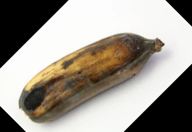

In [11]:
# select an example image
files = get_image_files(dst_train)
img = PILImage.create(files[0]) # Change the number here to pick a different image

# plot the image
img.to_thumb(192)

### Process the images

Load the image data used to train and test the network.

We will load the data using `ImageDataLoaders.from_folder` because our images are organized into folders.

The ImageDataLoaders will allow us to describe how the data should be loaded and transformed.

In [12]:
path = Path("/kaggle/working")
dls = ImageDataLoaders.from_folder(path,
                            train = 'Train_clean',
                            valid = 'Test_clean',
                            item_tfms = Resize(450, pad_mode='zeros'),
                            batch_tfms=[*aug_transforms(size=224, max_warp=0.), Normalize.from_stats(*imagenet_stats)],
                            bs=32)

The ImageDataLoaders.from_folder() function creates training and testing datasets from image folders.
The images from ‘Train_clean’ are used for training, and ‘Test_clean’ are used for testing.
Each image is resized to 450×450 pixels with zero padding meaning adding a black border to make it look like fixed shape. It is then augmented and normalized to match ImageNet statistics since ResNet-34 was pretrained on ImageNet.
The batch size is set to 32 meaning 32 images are processed at a time during training.

## Exploratory data analysis

 Our exploratory data analysis consists of examining example images. We can use the `show_batch()` method to show a few images and their labels.




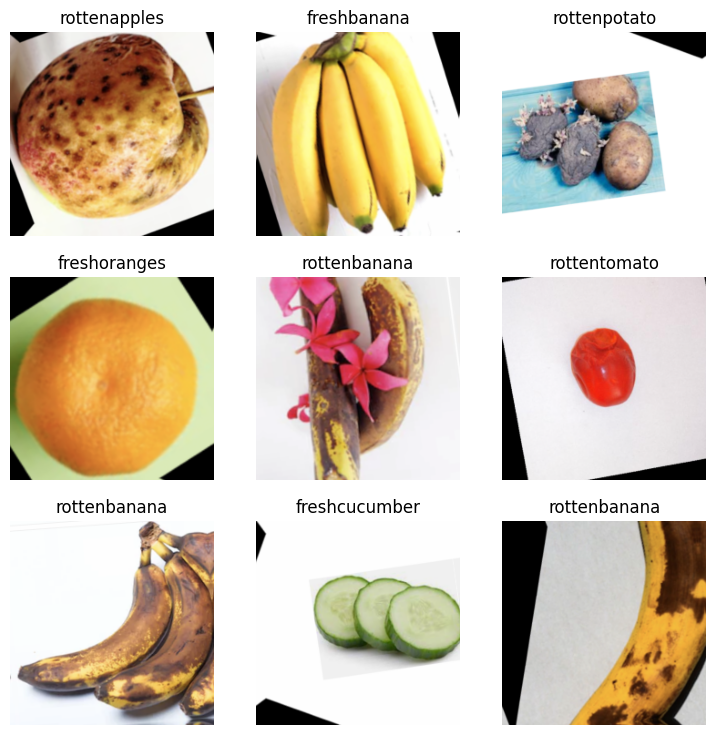

In [13]:

dls.show_batch(max_n=9)

## Modeling

We will use a deep neural network to build the classification model. Rather than training a network from scratch, we will modify an existing deep neural network to solve the problem of classifying fruits and vegetables to fresh or rotten.

The model will be based on the ResNet-34 deep neural network that was trained on the [ImageNet](https://www.image-net.org/) dataset.

![picture](https://storage.googleapis.com/kaggle-datasets-images/6978/10038/d9e74a548a8cdca167b38520ac8bf405/data-original.png?t=2017-12-13-20-32-53)

The ImageNet data set consists of images of many types.

We will use transfer learning to train the network to classify images as fresh or rotten fruits/vegetables.


### Train and test the model

We will train a model to classify images as fresh or rotten fruits/begetables, starting from the resnet34 model that has already been trained to solve an image classification problem involing many types of images.

We create a `vision_learner` object by specifying:

(1) the data loader created above `dls`,

(2) the name of the neural network we want to use as the basis for the model `resnet34`, and

(3) the metric we want to use to evaluate the performance of the model `error_rate`.



In [14]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:00<00:00, 193MB/s]


We are setting the number of epochs to 2 to obtain high accuracy.`learn.fine_tune` tells the model to perform transfer learning in two phases.

In [15]:
learn.fine_tune(epochs=2)

epoch,train_loss,valid_loss,error_rate,time
0,0.269215,0.150678,0.050312,03:31


epoch,train_loss,valid_loss,error_rate,time
0,0.114156,0.063508,0.019887,03:46
1,0.037040,0.018763,0.006085,03:44


Observations:

In the first phase,the pretrained layers of ResNet-34 are frozen, so only the new classifier head is trained.In this phase, the training loss was 0.28 and the validation loss was 0.17, with an error rate of about 5%.

In the second phase the Fastai unfreezes all layers and trains for 2 epochs.In this phase the model achieved very low losses and a very small error rate of 0.55%,

### Assess model performance

fast.ai has a `ClassificationInterpretation` function to help analyze the performance of the model.

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

In [17]:
interp.print_classification_report()

                precision    recall  f1-score   support

   freshapples       1.00      1.00      1.00       791
   freshbanana       1.00      1.00      1.00       892
 freshcucumber       0.96      0.99      0.97       279
     freshokra       0.99      0.99      0.99       370
  freshoranges       1.00      1.00      1.00       388
   freshpotato       0.97      0.97      0.97       270
   freshtomato       1.00      1.00      1.00       255
  rottenapples       1.00      1.00      1.00       988
  rottenbanana       1.00      1.00      1.00       900
rottencucumber       0.99      0.95      0.97       255
    rottenokra       0.97      0.99      0.98       224
 rottenoranges       1.00      1.00      1.00       403
  rottenpotato       0.98      0.98      0.98       370
  rottentomato       1.00      1.00      1.00       353

      accuracy                           0.99      6738
     macro avg       0.99      0.99      0.99      6738
  weighted avg       0.99      0.99      0.99 

Observation: The model correctly classified 99% of all images in test set.
On average, across all classes (treating each class equally), precision, recall, and F1-score are 0.99.When weighting by the number of samples per class, the model still averages 99%, showing consistent performance even across uneven class sizes.

Plot the confusion matrix, which shows the number of images in the validation set that were correctly and incorrectly classified by the model.

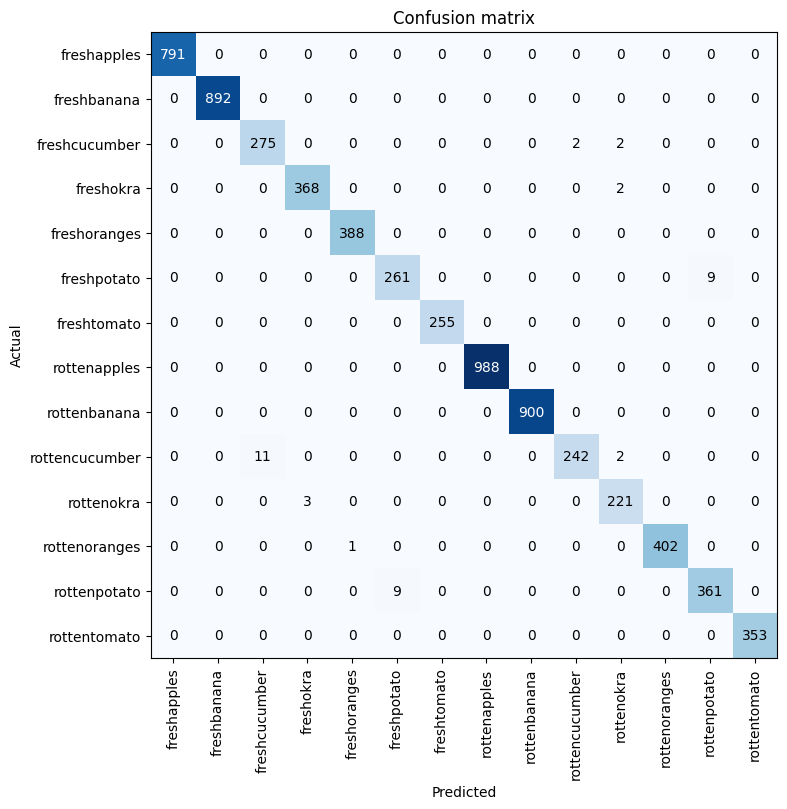

In [18]:
interp.plot_confusion_matrix(figsize=(8, 8))

The dataset used for testing contains an uneven number of samples for each fruit and vegetable category.  So the intensity of blue shades in the confusion matrix on the diagnol varies across classes. The darker shades on the diagnol correspond to classes with more samples, while lighter shades on the diagnol appear for those with fewer samples.

### Show the top loss images

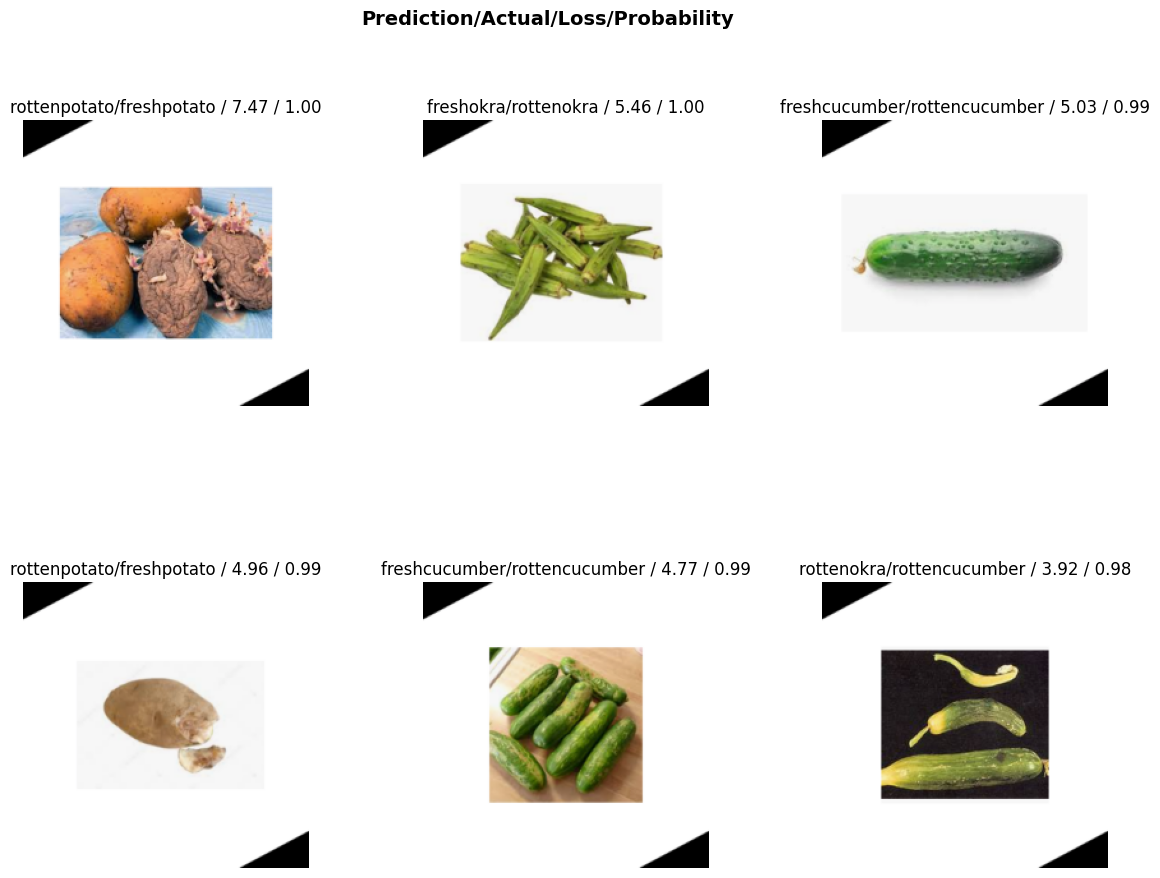

In [19]:
interp.plot_top_losses(
    6,
    figsize=(14, 10),          # larger figure = more room
    title="Prediction / Actual / Loss / Probability"
)

# After plotting, adjust title spacing and text size
plt.subplots_adjust(hspace=0.5, wspace=0.4)  # adds space between images
for ax in plt.gcf().axes:
    ax.title.set_fontsize(12)  # smaller text to prevent overlap

Observations:

The images above show the few cases where the model made wrong predictions. Most errors occurred between similar looking categories such as freshpotato vs rottenpotato and freshokra vs rottenokra. The last image predicted rotten okra for fresh cucumber may be because they look similar in color and texture. Overall these errors are minor and understandable.


## Deployment

We can use the model to predict if it is a fresh or rotten fruit/vegetable for an example image.

Predicted Fresh or rotten fruit/vegetable: rottenbanana.
Probability it is fresh or rotten fruit/vegetable =  1.000000


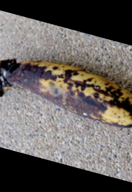

In [20]:
# Use the first image in the file_names list as an example

files = get_image_files(dst_test)
img = PILImage.create(files[0]) # Change the number here to pick a different image

# plot the image
img.to_thumb(192)


prediction,pred_idx,probs = learn.predict(img)

print(f"Predicted Fresh or rotten fruit/vegetable: {prediction}.")
print(f"Probability it is fresh or rotten fruit/vegetable =  {probs[pred_idx].item():.6f}")
img.to_thumb(192)

##### Try the the model with pictures of fruits/vegetables that you have of your own or find online.

In [21]:
!wget https://upload.wikimedia.org/wikipedia/commons/1/15/Red_Apple.jpg -O apple.jpg

--2025-12-04 21:31:01--  https://upload.wikimedia.org/wikipedia/commons/1/15/Red_Apple.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 576216 (563K) [image/jpeg]
Saving to: ‘apple.jpg’

apple.jpg           100%[===================>] 562.71K  --.-KB/s    in 0.08s   

2025-12-04 21:31:01 (6.55 MB/s) - ‘apple.jpg’ saved [576216/576216]



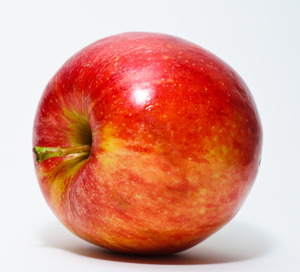

In [22]:
img = PILImage.create('apple.jpg')
img.to_thumb(300)

Predict the image class and plot the prediction

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

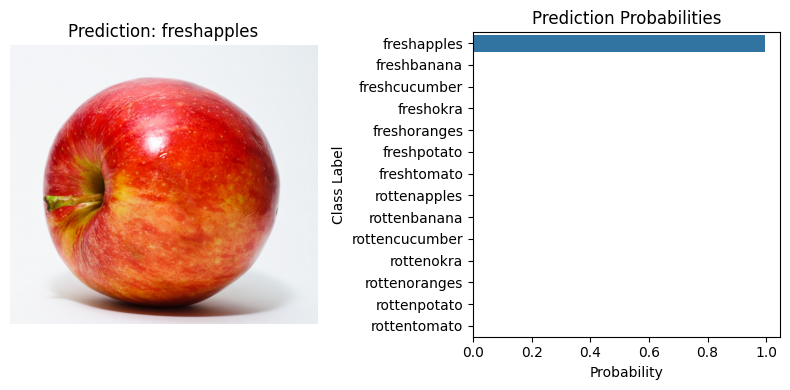

In [24]:
prediction, _, probs = learn.predict(img)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Display the image in the first subplot
axes[0].imshow(img)
axes[0].axis('off')
axes[0].set_title(f"Prediction: {prediction}")

# Display the bar plot in the second subplot
sns.barplot(x=probs, y=dls.vocab, orient='h', ax=axes[1])
axes[1].set_xlabel("Probability")
axes[1].set_ylabel("Class Label")
axes[1].set_title("Prediction Probabilities")

plt.tight_layout()
plt.show()

In [25]:
!wget -O banana.jpg "https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Banana_for_your_health.jpg/640px-Banana_for_your_health.jpg"




--2025-12-04 21:31:02--  https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Banana_for_your_health.jpg/640px-Banana_for_your_health.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61836 (60K) [image/jpeg]
Saving to: ‘banana.jpg’

banana.jpg          100%[===================>]  60.39K  --.-KB/s    in 0.04s   

2025-12-04 21:31:03 (1.37 MB/s) - ‘banana.jpg’ saved [61836/61836]



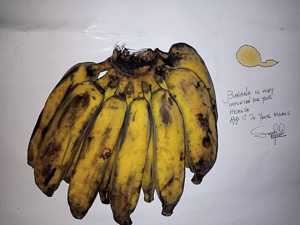

In [26]:
img = PILImage.create('banana.jpg')
img.to_thumb(300)

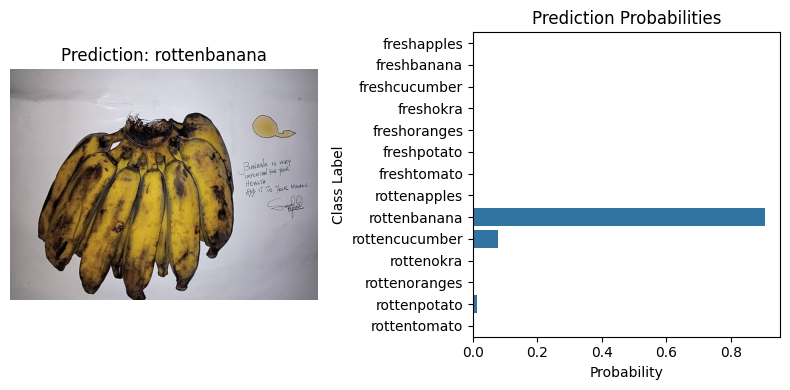

In [27]:
prediction, _, probs = learn.predict(img)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Display the image in the first subplot
axes[0].imshow(img)
axes[0].axis('off')
axes[0].set_title(f"Prediction: {prediction}")

# Display the bar plot in the second subplot
sns.barplot(x=probs, y=dls.vocab, orient='h', ax=axes[1])
axes[1].set_xlabel("Probability")
axes[1].set_ylabel("Class Label")
axes[1].set_title("Prediction Probabilities")

plt.tight_layout()
plt.show()

## Evaluation

The classification of fresh and rotten fruits plays a vital role in ensuring agricultural quality and consumer health. In this study, we used the ResNet-34 architecture to classify  various fruits and vegetables as fresh or rotten.

The model was trained and fine-tuned on the Fresh and Rotten Fruits and Vegetables Dataset, using various hyperparameter adjustments such as batch size, number of epochs, optimizer selection, and learning rate tuning to improve performance. Despite the dataset’s diversity in lighting, texture, and background, the ResNet-34 model achieved strong classification accuracy, demonstrating its ability to generalize across real-world variations.

The final model reached an accuracy of approximately 99%, indicating that deep learning can effectively automate the freshness classification process, significantly reducing manual inspection efforts and improving consistency in quality assessment.

References:

Tuğçe Göksu,Zeliha Kaya,Shaaban Sahmood-Classification of Fruit Images as Fresh and Rotten
Using Convolutional Neural Networks, 2023 3rd International Conference on Computing and Information Technology (ICCIT),
FCIT, University of Tabuk, KSA. 13 and 14/Sep/2023.

[Fresh and Rotten classification](https://www.kaggle.com/datasets/swoyam2609/fresh-and-stale-classification)-Kaggle

Tutorials : Dr Brian Fischer



